In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-05-30 02:53:55--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [    <=>             ]  22.62M  33.7MB/s    in 0.7s    

2025-05-30 02:53:55 (33.7 MB/s) - ‘online+retail.zip’ saved [23715478]



In [4]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [5]:
df1 = pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo': 'string', 'StockCode':'string','Description':'string','Country':'string'})
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


#### Data Cleaning

In [7]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [8]:
df1[df1.Description.isnull()] #gets rows where decriptions value is null (rows with no entry for description)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [9]:
df1[df1.StockCode =='22139'] #checking if there are other entries for this stock code where it has description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


### Now since there are multiple description for a stock I will find out the most frequent description to replace all the invalid description with the correct ones


In [10]:
most_freq = df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,21491,SET OF THREE VINTAGE GIFT WRAPS,1
4788,84876D,damaged,1
4789,20827,damages,1
4790,20832,check,1


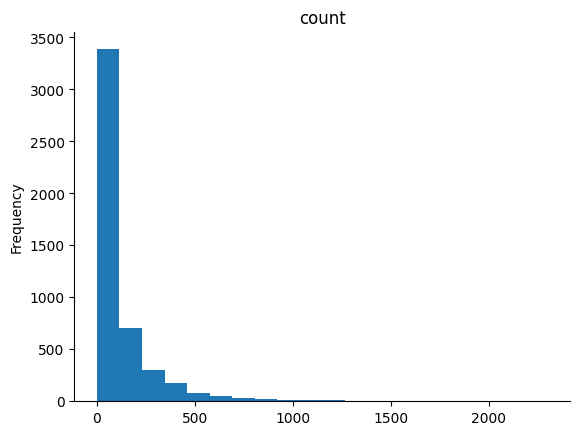

In [11]:
# @title count

from matplotlib import pyplot as plt
most_freq['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
most_freq = most_freq.groupby('StockCode').head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4755,37503,TEA TIME CAKE STAND IN GIFT BOX,1
4773,37461,FUNKY MONKEY MUG,1
4775,37474,SET/4 2 TONE EGG SHAPE MIXING BOWLS,1
4782,22145,CHRISTMAS CRAFT HEART STOCKING,1


In [13]:
most_freq.columns = ["StockCode",'freq_description',"count"]

df2 = df1.merge(most_freq, how='left', on='StockCode')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [14]:
df2['Description'] = df2['freq_description']
df2.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_description,count
309586,564096,23298,SPOTTY BUNTING,50,2011-08-23 10:36:00,4.15,16133.0,United Kingdom,SPOTTY BUNTING,1172.0
354445,567879,35970,ZINC FOLKART SLEIGH BELLS,12,2011-09-22 14:53:00,1.69,16161.0,United Kingdom,ZINC FOLKART SLEIGH BELLS,476.0
420724,572905,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-10-26 15:39:00,4.95,14690.0,United Kingdom,RETROSPOT TEA SET CERAMIC 11 PC,988.0
276058,561029,22303,COFFEE MUG APPLES DESIGN,6,2011-07-24 11:25:00,2.55,12490.0,France,COFFEE MUG APPLES DESIGN,273.0
259240,559693,21246,RED RETROSPOT BIG BOWL,4,2011-07-11 16:21:00,4.13,NaN,United Kingdom,RED RETROSPOT BIG BOWL,98.0


In [15]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freq_description,112
count,112


In [16]:
df2.dropna(subset=["Description"],inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_description,0
count,0


In [17]:
df2.drop(columns=['freq_description','count'],inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [19]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [20]:
df3 = df2[(df2.UnitPrice>0)&(df2.Quantity>0)]
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [22]:
df3['Quantity'].quantile(0.9999)

np.float64(1439.8763999990188)

In [23]:
df3[df3.Quantity>1500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,2011-01-11 12:55:00,1.85,15749.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50:00,0.21,16333.0,United Kingdom
87631,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2011-02-11 11:22:00,0.94,16029.0,United Kingdom


In [24]:
df4 = df3.copy()
df4['TotalPrice'] = df4.Quantity * df4.UnitPrice
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### Analysing Trends

In [25]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
21541,538093,85232D,SET/3 DECOUPAGE STACKING TINS,3,2010-12-09 14:49:00,4.95,12682.0,France,14.85,12
160009,550439,21756,BATH BUILDING BLOCK WORD,3,2011-04-18 12:17:00,5.95,18231.0,United Kingdom,17.85,4
473065,576779,84997C,CHILDRENS CUTLERY POLKADOT BLUE,1,2011-11-16 13:25:00,4.15,14554.0,United Kingdom,4.15,11
128891,547365,POST,POSTAGE,1,2011-03-22 12:36:00,15.00,12775.0,Netherlands,15.00,3
472794,576704,23355,HOT WATER BOTTLE KEEP CALM,2,2011-11-16 12:29:00,4.95,14527.0,United Kingdom,9.90,11


### Visualization of data and EDA

1.Sales by month

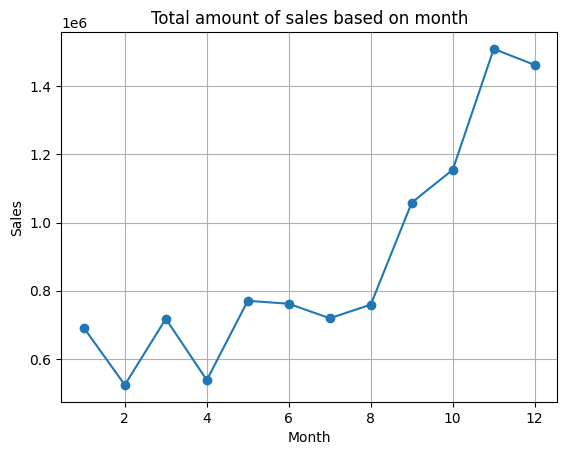

In [26]:
monthly_sales = df4.groupby('Month')["TotalPrice"].sum()
monthly_sales.plot(kind = 'line', title='Total amount of sales based on month', marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
plt.show()

# 📊 Sales Insights by Month

## Overview
The chart shows the **total amount of sales** on a monthly basis. The x-axis represents months (1 to 12), and the y-axis represents sales (in scientific notation, around the scale of 1e6).

## Key Insights

### 📉 Early Year Dip
- **January (Month 1):** Sales start off relatively strong.
- **February (Month 2):** Sharp decline in sales.
- **March to April (Months 3–4):** Sales recover in March but dip again in April.

### 📈 Mid-Year Stability
- **May to August (Months 5–8):** Sales remain relatively stable with slight fluctuations, hovering around the 750,000 mark.

### 🚀 Strong Growth in Later Months
- **September to December (Months 9–12):** Significant upward trend begins.
  - **September (Month 9):** Marked increase.
  - **October to November (Months 10–11):** Sharp growth, peaking in November.
  - **December (Month 12):** Slight dip from the peak, but still remains high.

## 📌 Summary
- The **second half of the year** shows **consistent growth** and **higher sales** compared to the first half.
- **November** is the **peak month** for sales.
- Potential reasons for the late-year rise could include seasonal demand (e.g., holidays, end-of-year spending, promotions).

## 📈 Recommendation
Focus marketing and inventory efforts on **Q4 (October to December)** to maximize revenue, and investigate the **sales drop in February and April** to address possible issues.


2. Top 5 Countries

In [27]:
df4.rename(columns={'TotalPrice':'TotalSales'}, inplace=True)

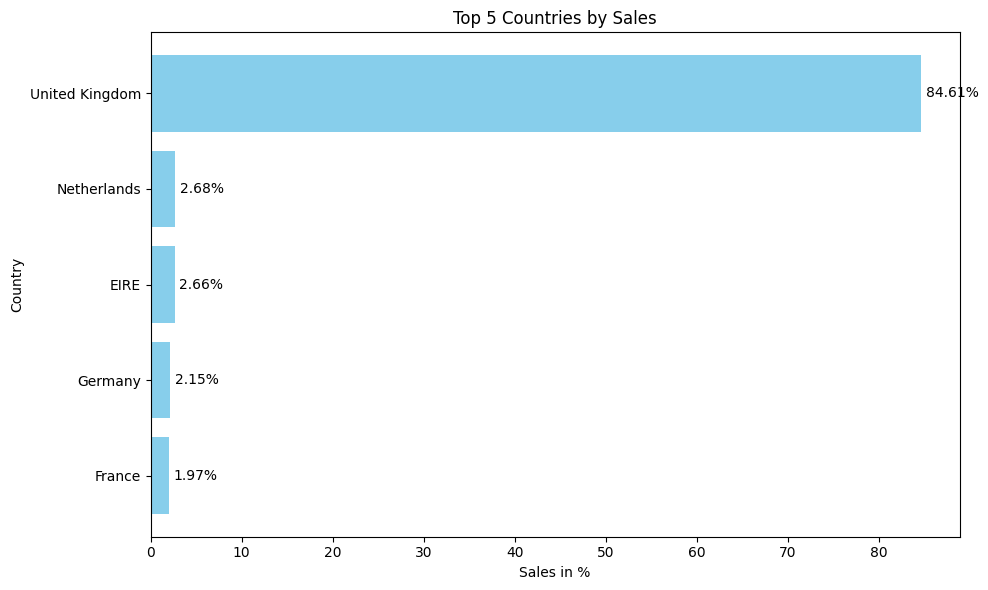

In [37]:
import matplotlib.pyplot as plt

country_wise_sales = df4.groupby('Country')['TotalSales'].sum()
total_sales = country_wise_sales.sum()
total_sales_in_percent = (country_wise_sales / total_sales) * 100
top_countries = total_sales_in_percent.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_countries.index, top_countries.values, color='skyblue')
plt.title('Top 5 Countries by Sales')
plt.xlabel('Sales in %')
plt.ylabel('Country')

# Add percentage labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}%', va='center')

plt.gca().invert_yaxis()  # Highest value at the top
plt.tight_layout()
plt.show()

#### 3. Top **Stocks**

<Axes: xlabel='StockCode'>

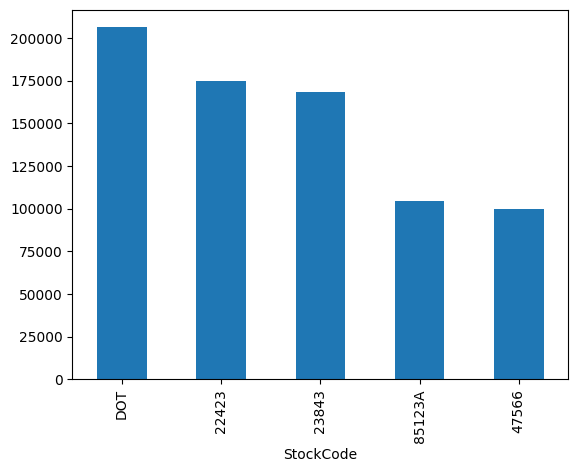

In [54]:
Stock_wise_sale = df4.groupby('StockCode')['TotalSales'].sum()

top_stocks =  Stock_wise_sale.sort_values(ascending=False).head(5)
top_stocks.plot(kind="bar")

#### 4. RFM Analysis

In [56]:
current_date = df4['InvoiceDate'].max() + pd.Timedelta(days=1)
current_date

Timestamp('2011-12-10 12:50:00')

In [59]:
rfm = df4.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x : (current_date - x.max()).days,
    "InvoiceNo" : "count",
    "TotalSales" : "sum"
})

rfm.columns = ["Recency","Frequency","Monetary"]
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [61]:
rfm['R_Recency'] = pd.qcut(rfm['Recency'],4,labels=[1,2,3,4])
rfm['R_Frequency'] = pd.qcut(rfm['Frequency'],4,labels=[4,3,2,1])
rfm['R_Monetary'] = pd.qcut(rfm['Monetary'],4,labels=[4,3,2,1])
rfm['RFM_score'] = rfm[['R_Recency','R_Frequency','R_Monetary']].sum(axis=1)
rfm.head()

,Recency,Frequency,Monetary,R_Recency,R_Frequency,R_Monetary,RFM_score
CustomerID,,,,,,,
12346.0,326,1,77183.60,4,4,1,9
12347.0,2,182,4310.00,1,1,1,3
12348.0,75,31,1797.24,3,3,1,7
12349.0,19,73,1757.55,2,2,1,5
12350.0,310,17,334.40,4,4,3,11


In [62]:
rfm.sort_values('RFM_score',ascending=False)

,Recency,Frequency,Monetary,R_Recency,R_Frequency,R_Monetary,RFM_score
CustomerID,,,,,,,
14090.0,325,1,76.32,4,4,4,12
17118.0,318,10,157.02,4,4,4,12
17117.0,288,9,116.20,4,4,4,12
17110.0,165,12,163.30,4,4,4,12
14148.0,234,3,157.20,4,4,4,12
...,...,...,...,...,...,...,...
16626.0,1,179,4413.10,1,1,1,3
14796.0,1,1141,8022.49,1,1,1,3
17625.0,18,315,2047.00,1,1,1,3


5. Customer Churn Analysis

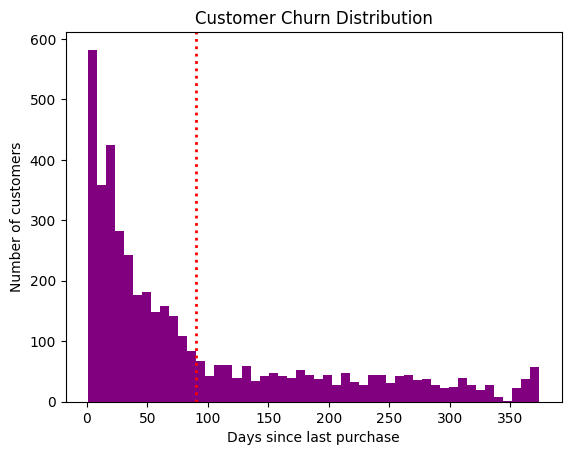

In [73]:

plt.hist(rfm['Recency'],bins=50, color='purple')
plt.title("Customer Churn Distribution")
plt.axvline(x=90, color='red', linestyle='dotted', linewidth=2)
plt.xlabel("Days since last purchase")
plt.ylabel("Number of customers")
plt.show()

The histogram visualizes the distribution of customers based on their Recency (days since last purchase).

*   **Observation:** The histogram shows the number of customers grouped by the number of days since their last purchase. There appears to be a peak in the number of customers with a certain range of recency, and the distribution tails off for higher recency values. The dotted red line at 90 days likely represents a threshold for considering a customer as potentially churned.
*   **Analysis:** This chart helps to understand the overall customer retention health. A large number of customers with high recency might indicate a churn problem. The peak in the distribution suggests a common pattern in customer purchase intervals.
*   **Insight:** Monitoring this distribution over time can help assess the effectiveness of retention strategies and identify periods where churn risk is higher.



## Conclusion

This comprehensive analysis of the online retail dataset has provided a deep dive into various aspects of the business, leading to actionable insights for strategic decision-making.

Our journey began with rigorous data cleaning and preprocessing. We addressed missing values in product descriptions by leveraging the most frequent description associated with each stock code, ensuring data integrity. We also filtered out invalid entries based on quantity and unit price, resulting in a cleaner dataset for analysis. Feature engineering involved calculating the total price for each transaction and extracting the month from the invoice date, laying the groundwork for understanding sales trends over time.

The visualization of sales by month clearly illustrated the significant seasonal peaks in the latter part of the year, particularly in November, driven by holiday shopping and promotional events. This finding underscores the importance of optimizing inventory and marketing efforts during these crucial periods. The analysis of country-wise sales highlighted the overwhelming dominance of the United Kingdom market, revealing a high concentration of revenue from a single geographic location. While this indicates a strong presence in the UK, it also points to a potential vulnerability and the need to explore strategies for diversifying revenue streams through international expansion.

Identifying the top-selling stock items provided valuable insights into product popularity and demand. These key products represent significant revenue drivers and warrant focused attention in terms of inventory management, marketing, and potential cross-selling opportunities. Understanding the characteristics of these top performers can also inform product development and sourcing strategies.

The RFM analysis allowed us to segment customers based on their purchasing behavior (Recency, Frequency, and Monetary value). This segmentation provides a powerful tool for understanding customer lifetime value and tailoring marketing strategies to different customer groups. By identifying high-value customers, at-risk customers, and inactive customers, we can implement targeted campaigns to foster loyalty, encourage re-engagement, and ultimately improve customer retention.

Finally, the customer churn distribution provided a visual representation of customer activity and highlighted the proportion of customers who have not made a recent purchase. The identified threshold of 90 days as a potential indicator of churn allows for proactive measures to re-engage inactive customers and mitigate customer attrition.

In conclusion, through a systematic process of data cleaning, feature engineering, and visualization, we have uncovered key trends, identified critical customer segments, and gained valuable insights into the performance of the online retail business. These findings provide a solid foundation for developing data-driven strategies to optimize sales, improve customer retention, and drive overall business growth.